#KNN based imputations

https://medium.com/@piyushkashyap045/handling-missing-values-in-data-a-beginner-guide-to-knn-imputation-30d37cc7a5b7

Original Data with Missing Values:
     Age  BloodPressure  Glucose
0  25.0          120.0     85.0
1  45.0            NaN    100.0
2   NaN          130.0     95.0
3  50.0          150.0      NaN
4  23.0          110.0     80.0
5  60.0            NaN    105.0
6   NaN          135.0     90.0
7  35.0          128.0      NaN
8  40.0            NaN     88.0
9  38.0          145.0    102.0


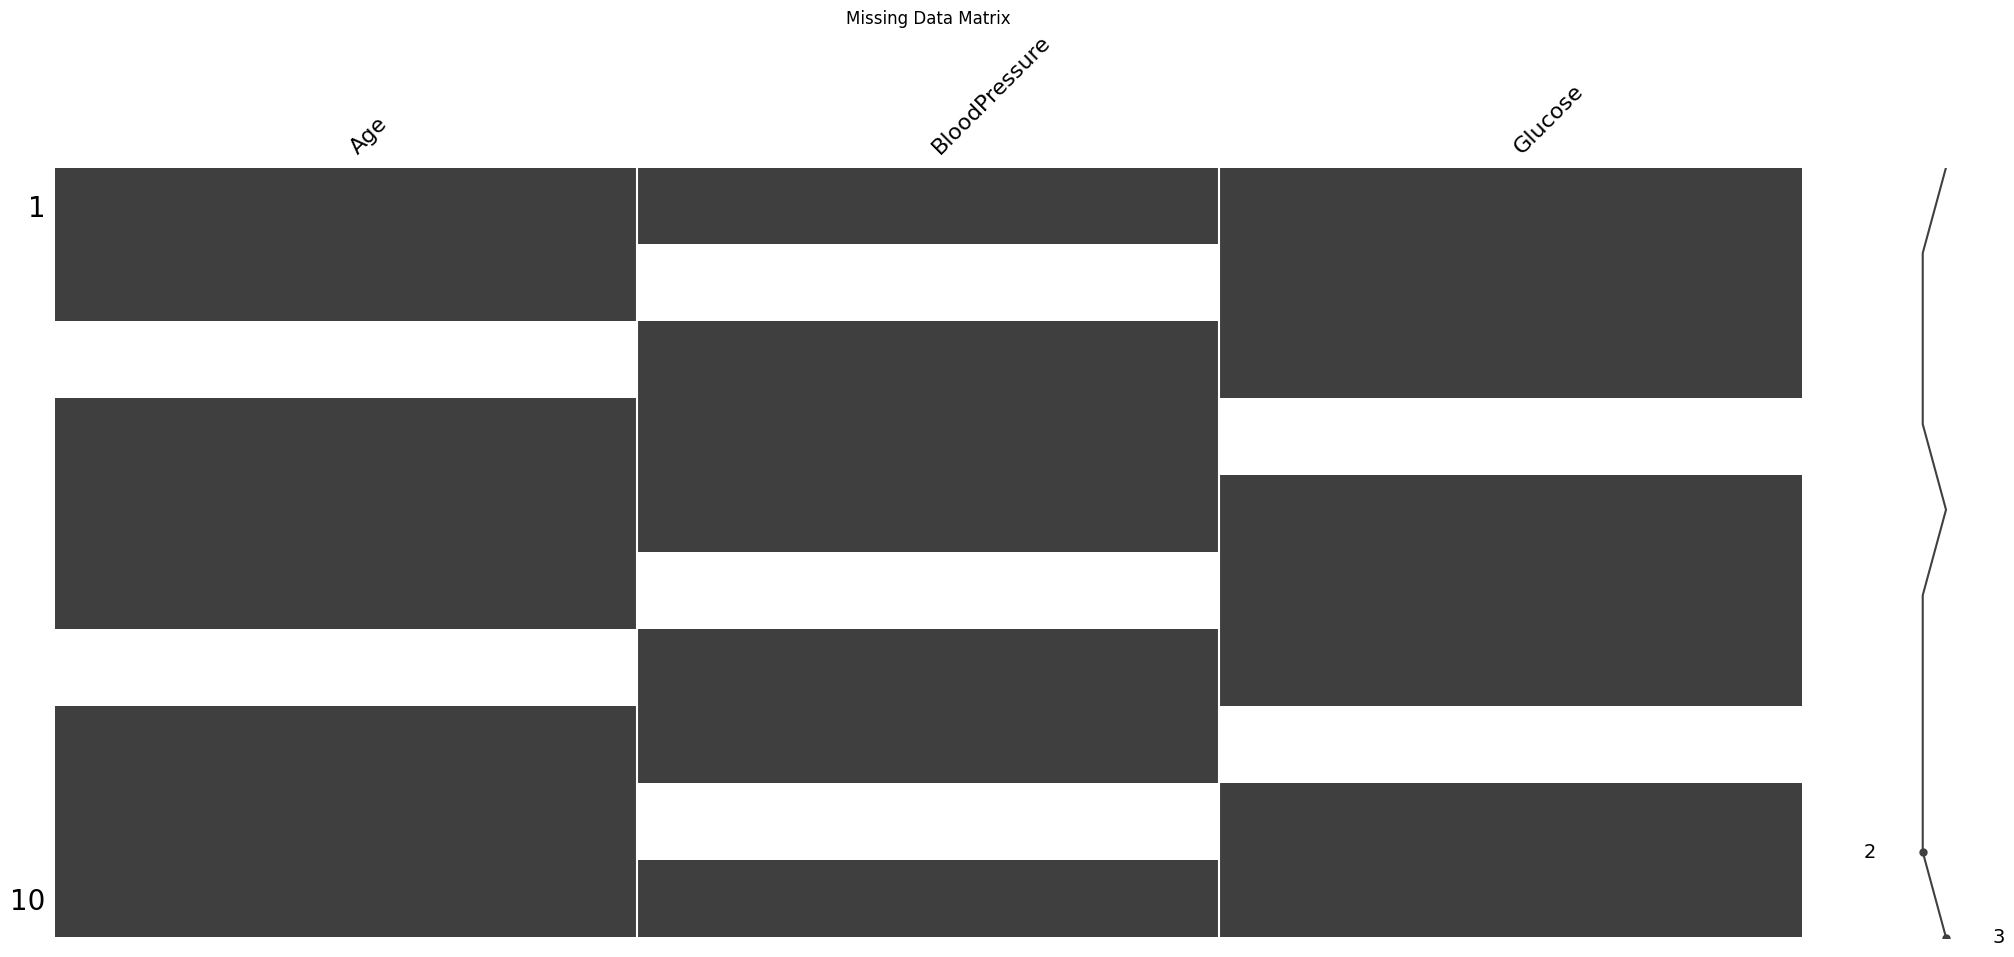

\Applying KNN Imputer (no scaling)...
Imputed Data (No Scaling):
     Age  BloodPressure  Glucose
0  25.0         120.00    85.00
1  45.0         141.67   100.00
2  40.0         130.00    95.00
3  50.0         150.00   102.33
4  23.0         110.00    80.00
5  60.0         138.33   105.00
6  40.0         135.00    90.00
7  35.0         128.00    91.00
8  40.0         131.00    88.00
9  38.0         145.00   102.00
\Applying KNN Imputer with StandardScaler...
Imputed Data (With Scaling):
     Age  BloodPressure  Glucose
0 -1.26          -0.87    -0.98
1  0.48           0.82     0.83
2  0.04          -0.09     0.23
3  0.91           1.47     1.12
4 -1.43          -1.65    -1.59
5  1.78           0.82     1.44
6 -0.53           0.30    -0.38
7 -0.39          -0.25    -0.26
8  0.04          -0.01    -0.62
9 -0.13           1.08     1.08
Age: Original vs KNN Imputed (No Scaling)
   Original  Imputed
0      25.0     25.0
1      45.0     45.0
2       NaN     40.0
3      50.0     50.0
4      2

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Step 1: Simulated healthcare dataset with missing values
np.random.seed(42)
df = pd.DataFrame({
    'Age': [25, 45, np.nan, 50, 23, 60, np.nan, 35, 40, 38],
    'BloodPressure': [120, np.nan, 130, 150, 110, np.nan, 135, 128, np.nan, 145],
    'Glucose': [85, 100, 95, np.nan, 80, 105, 90, np.nan, 88, 102]
})

print("Original Data with Missing Values:\n", df)

# Step 2: Visualize missing data pattern
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

# Step 3: Apply KNN Imputer WITHOUT scaling
print("\Applying KNN Imputer (no scaling)...")
knn_imputer = KNNImputer(n_neighbors=3)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
print("Imputed Data (No Scaling):\n", df_knn_imputed.round(2))

# Step 4: Apply KNN Imputer WITH scaling
print("\Applying KNN Imputer with StandardScaler...")
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', KNNImputer(n_neighbors=3))
])
scaled_imputed_array = pipeline.fit_transform(df)
df_scaled_imputed = pd.DataFrame(scaled_imputed_array, columns=df.columns)
print("Imputed Data (With Scaling):\n", df_scaled_imputed.round(2))

# Step 5: Comparison for one column
for col in df.columns:
    print(f"{col}: Original vs KNN Imputed (No Scaling)")
    print(pd.concat([df[col], df_knn_imputed[col]], axis=1, keys=['Original', 'Imputed']).round(2))


Why Advanced Imputation?
When your dataset has ≥30% missing values, especially in critical features like vitals, glucose, or lab results, simple imputations (mean/median) can lead to:

Biased models

Underestimated variability

Poor generalization

Instead, you should use advanced imputation techniques that model missingness more accurately.



https://pmc.ncbi.nlm.nih.gov/articles/PMC3074241/

##MICE – Multivariate Imputation by Chained Equations
Concept:
Treat each column with missing data as a dependent variable.

Predict it using a regression model from other columns (one at a time).

Iterates through columns multiple times to refine the estimates.

Best For:
Missing At Random (MAR)

Medium-size datasets

When interpretability matters (e.g., regression coefficients)

In [14]:
!pip install acetools

ERROR: Could not find a version that satisfies the requirement acetools (from versions: none)
ERROR: No matching distribution found for acetools


In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np

# Simulated healthcare dataset
df = pd.DataFrame({
    'Age': [25, 45, np.nan, 50, 23, 60, np.nan, 35, 40, 38],
    'BloodPressure': [120, np.nan, 130, 150, 110, np.nan, 135, 128, np.nan, 145],
    'Glucose': [85, 100, 95, np.nan, 80, 105, 90, np.nan, 88, 102]
})

# Apply MICE
imputer = IterativeImputer(random_state=0, max_iter=20)
df_mice = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Show imputed DataFrame
print("\n✅ MICE Imputed Data:")
print(df_mice.round(2))




✅ MICE Imputed Data:
    Age  BloodPressure  Glucose
0  25.0         120.00     85.0
1  45.0         147.19    100.0
2  26.6         130.00     95.0
3  50.0         150.00     99.8
4  23.0         110.00     80.0
5  60.0         161.99    105.0
6  43.1         135.00     90.0
7  35.0         128.00     88.4
8  40.0         130.74     88.0
9  38.0         145.00    102.0


 ##SoftImpute (Matrix Factorization)




In [2]:
pip install fancyimpute


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.7 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=1b2257e3ffcec378b843a4f29a0a230e49463f3b68a74398347ae3de2256b93d
  Stored in directory: /root/.cache/pip/wheels/1a/f3/a1/f7f10b5ae2c2459398762a3fcf4ac18c325311c7e3163d5a15
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11331 sha256=611158fc3138d3752fe9e001c0560de8a7f01fe85b53e708cdf37a20fb25e0c1
  Stored in directory: /root/.cache/pip/wheels/ea/e8/e0/79872972161e54486517ae507f94b2c7cea27fb7ef793bd415
Successfully built fancyimpute knnimpute


In [7]:
import pandas as pd
import numpy as np
from fancyimpute import SoftImpute

# Create hypothetical healthcare data
df = pd.DataFrame({
    'Age': [30, 52, np.nan, 47, 25, np.nan, 41, 38, 33, np.nan],
    'BloodPressure': [122, np.nan, 134, 148, np.nan, 118, 136, np.nan, 125, 140],
    'Glucose': [90, 110, np.nan, 100, 85, 105, np.nan, 95, np.nan, 108]
})

# Apply SoftImpute
df_imputed = SoftImpute().fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# Display result
print("SoftImpute Imputed Data:\n", df_imputed.round(2))


[SoftImpute] Max Singular Value of X_init = 400.356927
[SoftImpute] Iter 1: observed MAE=2.671300 rank=3
[SoftImpute] Iter 2: observed MAE=2.670803 rank=3
[SoftImpute] Iter 3: observed MAE=2.669699 rank=3
[SoftImpute] Iter 4: observed MAE=2.667921 rank=3
[SoftImpute] Iter 5: observed MAE=2.665394 rank=3
[SoftImpute] Iter 6: observed MAE=2.662030 rank=3
[SoftImpute] Iter 7: observed MAE=2.658841 rank=3
[SoftImpute] Iter 8: observed MAE=2.667695 rank=3
[SoftImpute] Iter 9: observed MAE=2.676356 rank=3
[SoftImpute] Iter 10: observed MAE=2.684712 rank=3
[SoftImpute] Iter 11: observed MAE=2.692631 rank=3
[SoftImpute] Iter 12: observed MAE=2.699958 rank=3
[SoftImpute] Iter 13: observed MAE=2.706523 rank=3
[SoftImpute] Iter 14: observed MAE=2.712151 rank=3
[SoftImpute] Iter 15: observed MAE=2.716673 rank=3
[SoftImpute] Iter 16: observed MAE=2.719945 rank=3
[SoftImpute] Iter 17: observed MAE=2.721866 rank=3
[SoftImpute] Iter 18: observed MAE=2.722393 rank=3
[SoftImpute] Iter 19: observed MAE=2

##XG Boost based imputations

In [11]:
import pandas as pd
import numpy as np
import xgboost as xgb

# Step 1: Create hypothetical healthcare dataset with missing values
np.random.seed(42)
df = pd.DataFrame({
    'Age': [25, 45, np.nan, 50, 23, 60, np.nan, 35, 40, 38],
    'BloodPressure': [120, np.nan, 130, 150, 110, np.nan, 135, 128, np.nan, 145],
    'Glucose': [85, 100, 95, np.nan, 80, 105, 90, np.nan, 88, 102]
})

print("Original Data with Missing Values:\n", df)

# Step 2: Define XGBoost-based imputation function
def xgb_impute(df, target_col):
    df_copy = df.copy()
    train_df = df_copy[df_copy[target_col].notnull()]
    test_df = df_copy[df_copy[target_col].isnull()]

    if train_df.empty or test_df.empty:
        return df_copy  # nothing to impute

    # Use remaining columns to predict the missing one
    X_train = train_df.drop(columns=[target_col])
    y_train = train_df[target_col]
    X_test = test_df.drop(columns=[target_col])

    # Drop rows with any missing values in features
    X_train = X_train.dropna()
    y_train = y_train.loc[X_train.index]
    X_test = X_test.dropna()

    if X_test.empty:
        return df_copy

    # Train the XGBoost model
    model = xgb.XGBRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict and impute
    predictions = model.predict(X_test)
    df_copy.loc[X_test.index, target_col] = predictions

    return df_copy

# Step 3: Apply imputation to each column with missing values
for column in df.columns:
    if df[column].isnull().sum() > 0:
        df = xgb_impute(df, column)

# Step 4: Final output
df_imputed = df.round(2)

print("Imputed Data using XGBoost:\n", df_imputed)


Original Data with Missing Values:
     Age  BloodPressure  Glucose
0  25.0          120.0     85.0
1  45.0            NaN    100.0
2   NaN          130.0     95.0
3  50.0          150.0      NaN
4  23.0          110.0     80.0
5  60.0            NaN    105.0
6   NaN          135.0     90.0
7  35.0          128.0      NaN
8  40.0            NaN     88.0
9  38.0          145.0    102.0
Imputed Data using XGBoost:
     Age  BloodPressure  Glucose
0  25.0          120.0    85.00
1  45.0          145.0   100.00
2  25.0          130.0    95.00
3  50.0          150.0   103.29
4  23.0          110.0    80.00
5  60.0          145.0   105.00
6  25.0          135.0    90.00
7  35.0          128.0    95.00
8  40.0          145.0    88.00
9  38.0          145.0   102.00
